#### Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Target

Need to perform clustering to summarize customer segments.

#### Acknowledgement

The dataset for this project is provided by Dr. Omar Romero-Hernandez.

#### Solution

You can take help from following link to know more about the approach to solve this problem.
Visit this URL

#### Inspiration

happy learning….

Hope you like this dataset please don't forget to like this dataset

#### People

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>

#### Products

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

#### Promotion

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

#### Place

NumWebPurchases: Number of purchases made through the company’s website<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Observed 24 null values in Income.<br>
The values will be filled with the mean of the column.

In [7]:
df.fillna(df['Income'].mean(), inplace=True)

Now I'll check out for duplicated values.

In [8]:
df.duplicated().sum()

0

# Feature Engineering

Creating "Age", "Children", "MntSpent", "NumPurchases", "Marital_Status" out of existing columns.

In [9]:
df['Age'] = 2022 - df['Year_Birth']

df['Children'] = df['Kidhome'] + df['Teenhome']

df['MntSpent'] = (df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] 
+ df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'])

df['NumPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

df['Marital_Status'].replace({'Married':'Together', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single',
                              'Absurd':'Single', 'YOLO':'Single'}, inplace=True)

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together'], dtype=object)

Dropping irrelevant columns.

In [11]:
df.drop(['ID', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'Year_Birth'], inplace=True, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

# EDA

In [13]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Children', 'MntSpent', 'NumPurchases'],
      dtype='object')

In [14]:
eda_cols = ['Income', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Age', 'Children', 'NumPurchases']

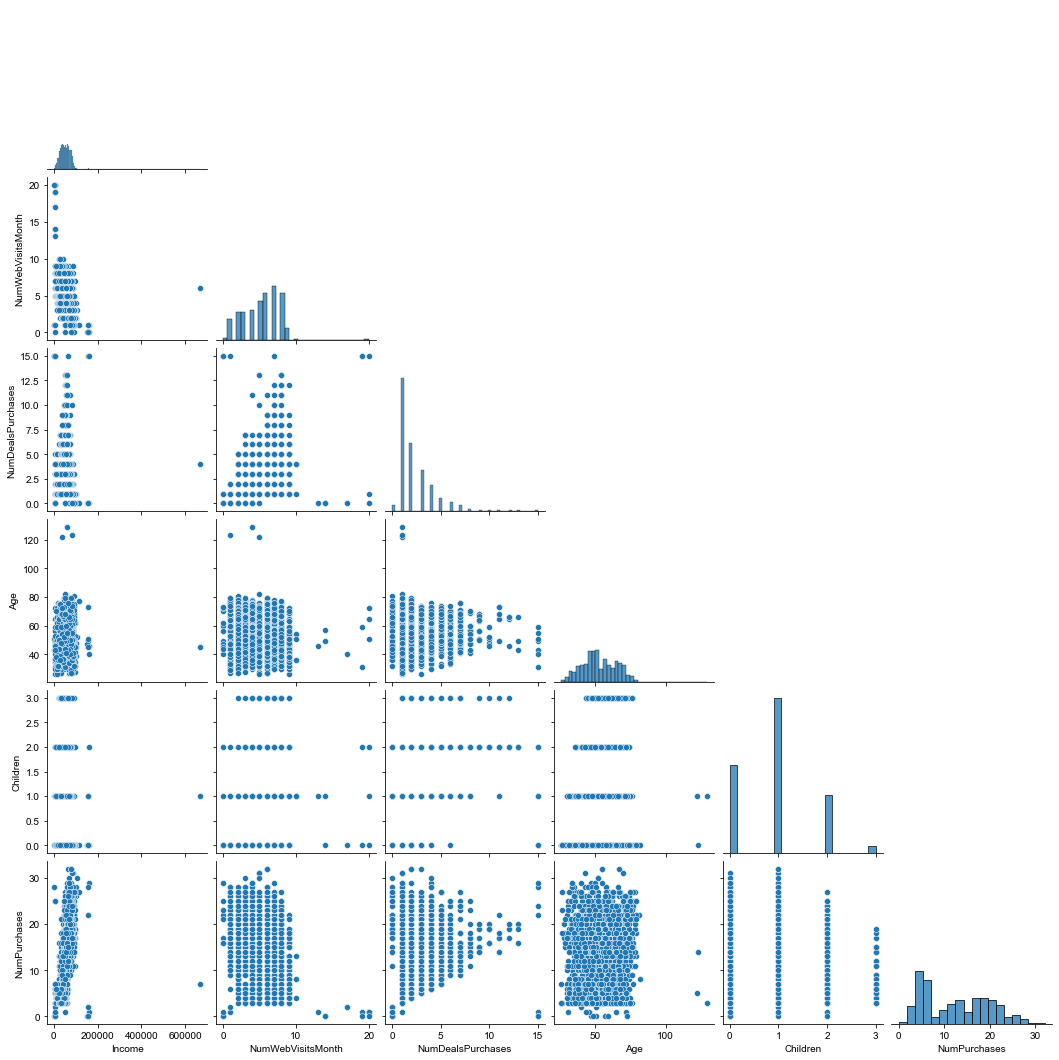

In [15]:
sns.pairplot(df[eda_cols], corner=True)
sns.set_theme()

Above we can see 3 outliers in Age column, they have more than 120 years old.<br>
Another outlier in Income column, wich has more than 600,000.00 household income.<br>
In NumDealsPurchase we have a very strange behavior in 2 points, they have 15 purchases made with a discount but the sum of purchases made in our company by them is 0 and 1.<br>
<br>
We notice that everyone who has 3 children made a purchase, but none of them exceeds 20 purchases in total.

In [16]:
df.drop(df[df['Age'] > 120].index, inplace=True)
df.drop(df[df['Income'] > 600000].index, inplace=True)

In [17]:
df.drop(df[(df['NumDealsPurchases'] == 15) & (df['NumPurchases'] < 15)].index, inplace=True)

Now I'll plot the distribution of our columns

In [18]:
eda_cols.remove('Children')

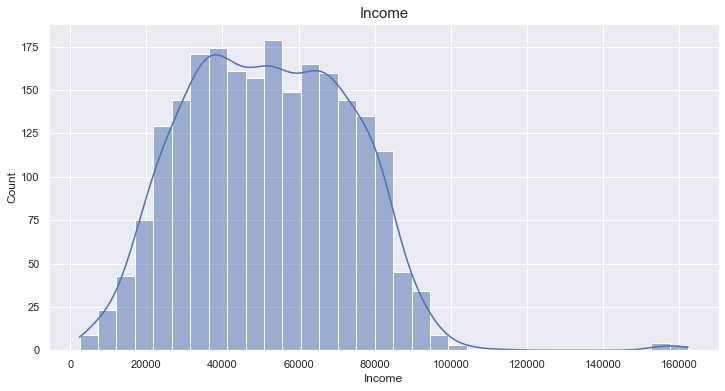

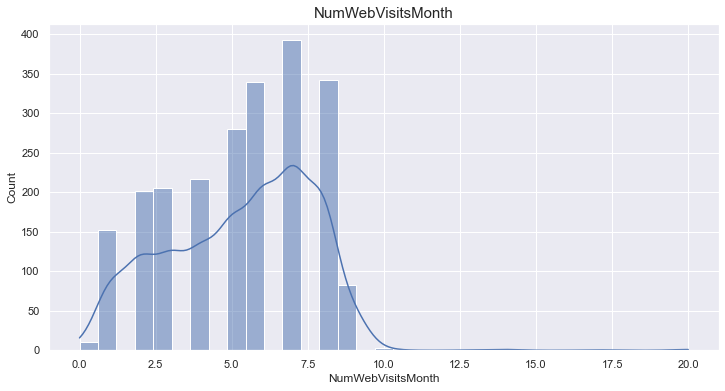

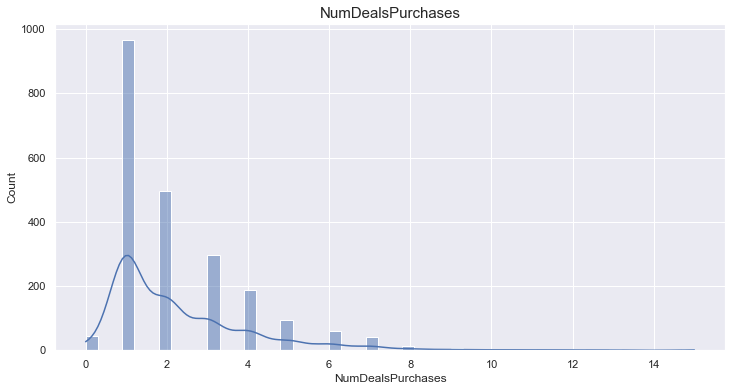

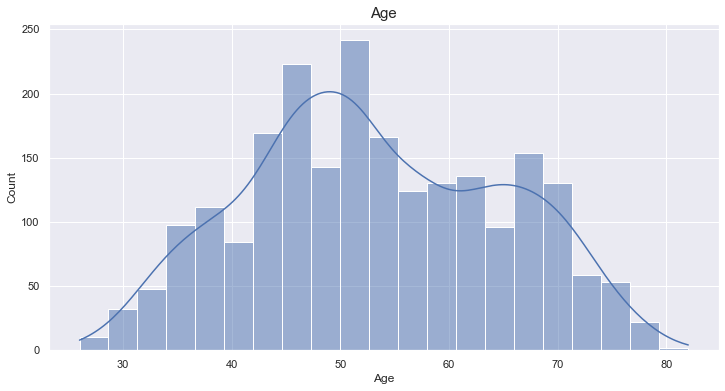

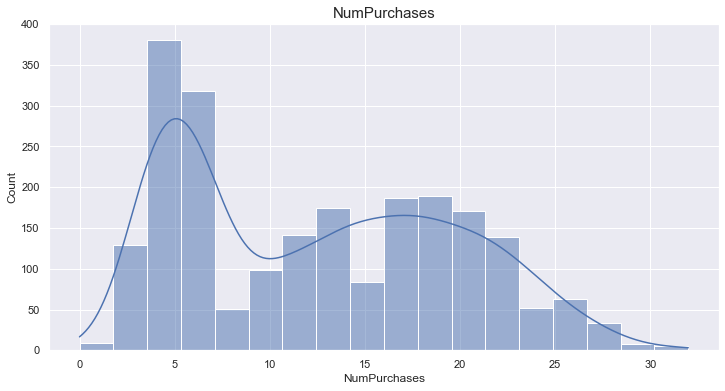

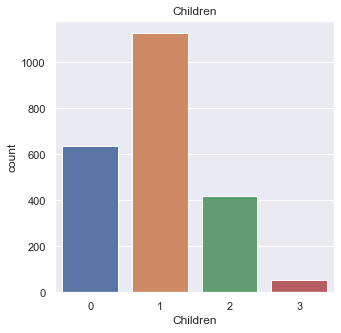

In [19]:
for column in eda_cols:
    plt.figure(figsize=(12,6))
    plt.title(column, fontdict={'fontsize': 15})
    sns.set_theme()
    sns.histplot(df[column], kde=True)
    plt.show()
    print()
    
plt.figure(figsize=(5,5))
plt.title('Children')
sns.set_theme()
sns.countplot(data=df, x='Children')
plt.show()

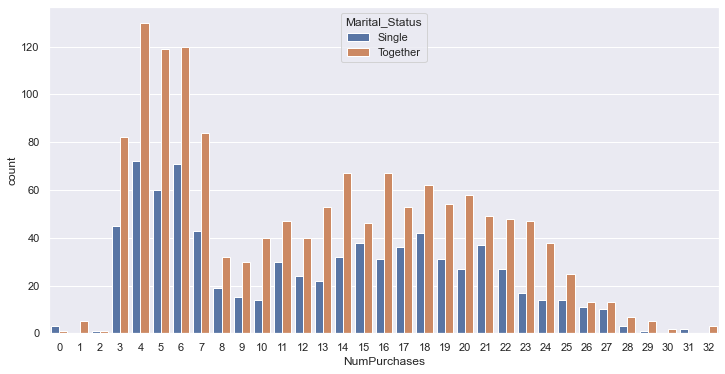

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='NumPurchases', hue='Marital_Status')
plt.show()

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Important considerations:
- More than a half of our customers has 1 children;
- The majority of our customers have an anual income between 20,000.00 and 80,000.00 dollars;
- Almost a half of our customers have made 1 purchase with discount;
- The majority of our customers have an age between 35 and 73 years old;
- We have just some few (minus than 15) customers who hasn't buyed anything;
- The majority of our customers are from people who live with someone (together classified).

<AxesSubplot:>

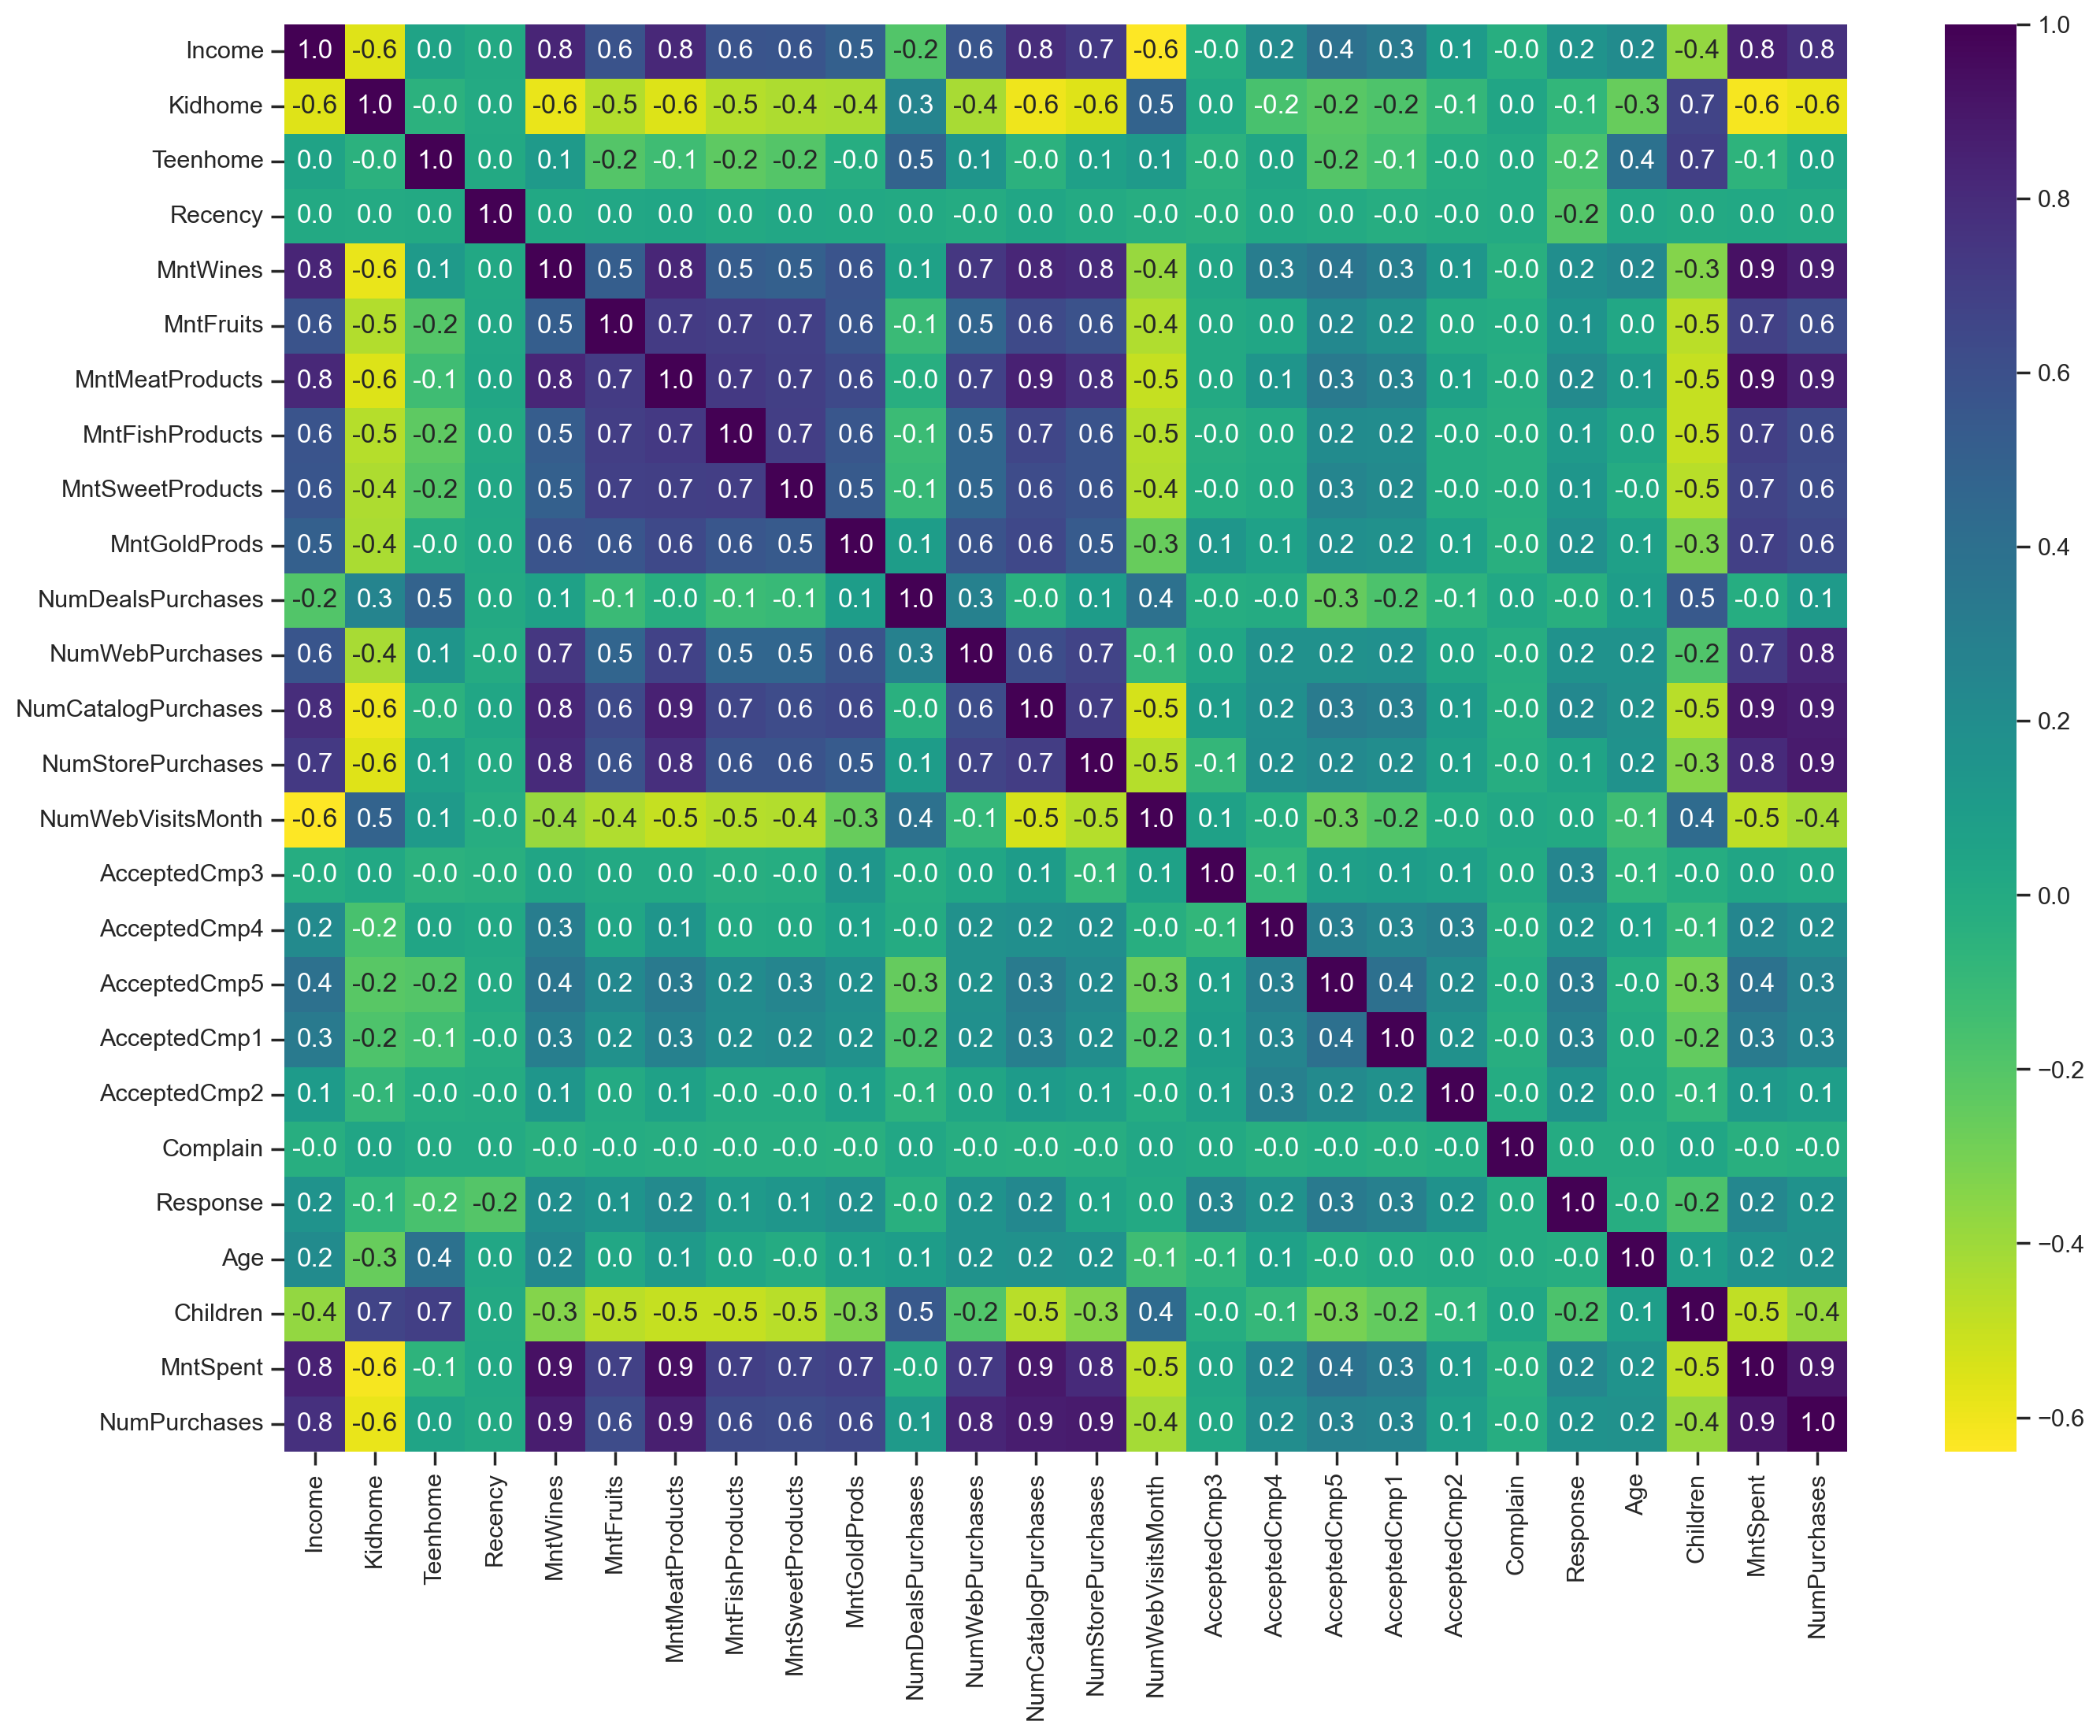

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(method='spearman'), cmap='viridis_r', annot=True, fmt='.1f')

*Heatmap displaying the Spearman Rank Correlation between the variables.*<br>
We can see clearly with the numbers and colors that our dataset has a lot of correlational features.

# Data Preprocessing

In [22]:
num_features = ['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntSpent',
 'NumPurchases',
 'Age']

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.copy()

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [24]:
X.reset_index(inplace=True)
X.drop('index', axis=1, inplace=True)

ohe = OneHotEncoder(drop='first')
X = X.join(pd.DataFrame(ohe.fit_transform(X[['Education']]).toarray(), 
                   columns=['Basic','Graduation','Master','PhD'])).drop('Education', axis=1)

X = X.join(pd.DataFrame(ohe.fit_transform(X[['Marital_Status']]).toarray(), 
                        columns=['Together'])).drop('Marital_Status', axis=1)

Now we need to do PCA to reduce the dimensionality of our dataset.<br>
Dimensionality is the number of features.

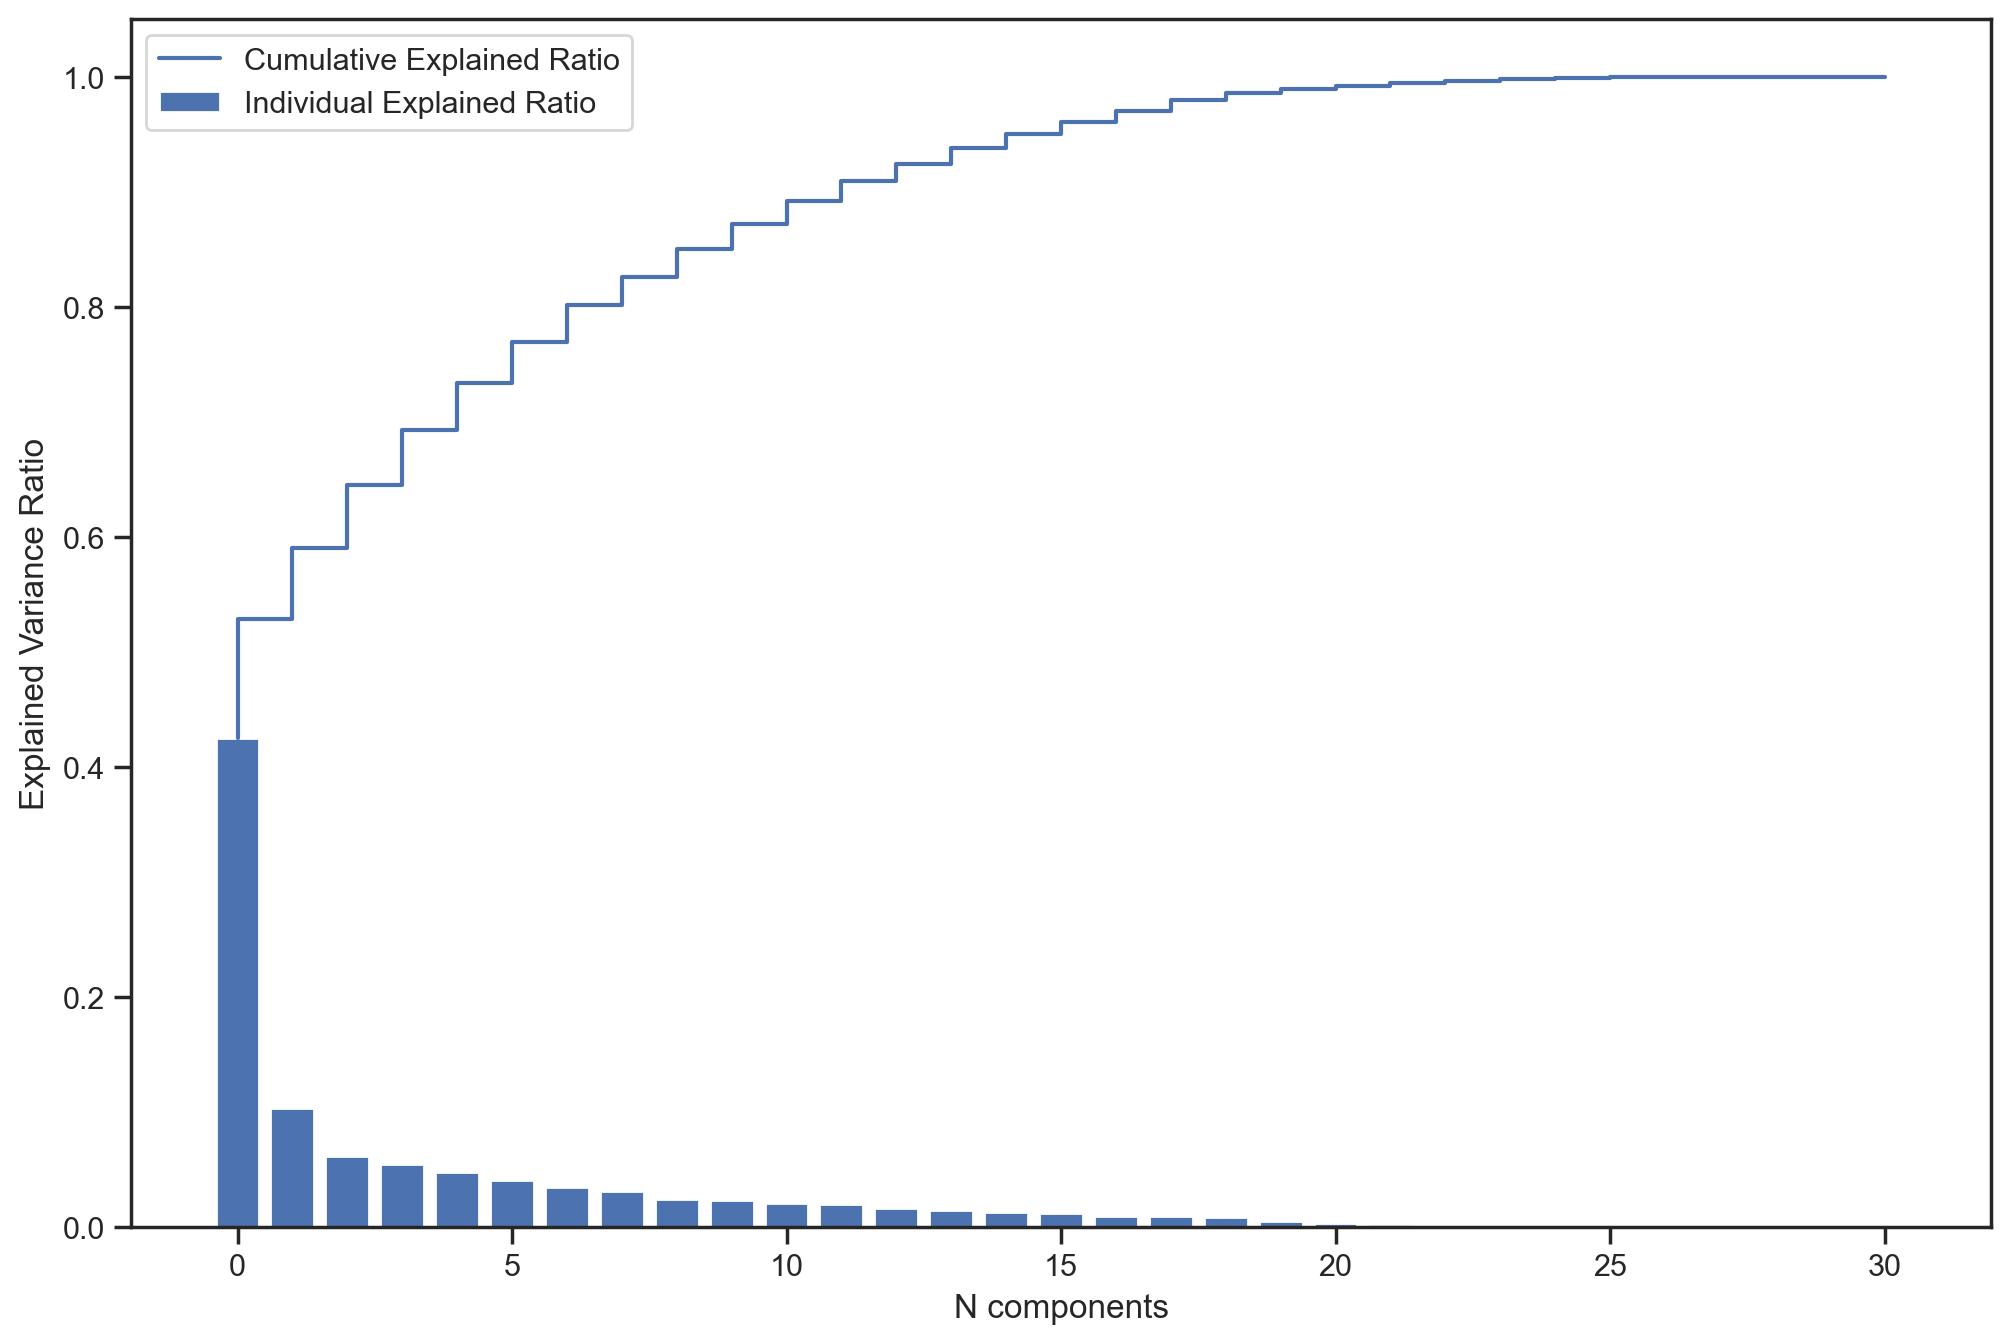

In [25]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

In [26]:
pca = PCA(n_components=7)
pca.fit(X)
pca.explained_variance_ratio_.sum()

0.7694134298728044

The sum of the 7th first components holds an cumulative explained ratio of 77% of our dataset.

In [27]:
pca.transform(X).shape

(2233, 7)

In [28]:
pca_df = pd.DataFrame(pca.transform(X))

I created a dataframe from our pca to 

In [29]:
from sklearn.cluster import KMeans

model_scores = []

for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=101)
    model.fit(pca_df)
    model_scores.append(model.inertia_)

Even KMeans.inertia_ as KMeans.score(X) are the "same" results. The difference is that inertia is positive and .score() is negative.

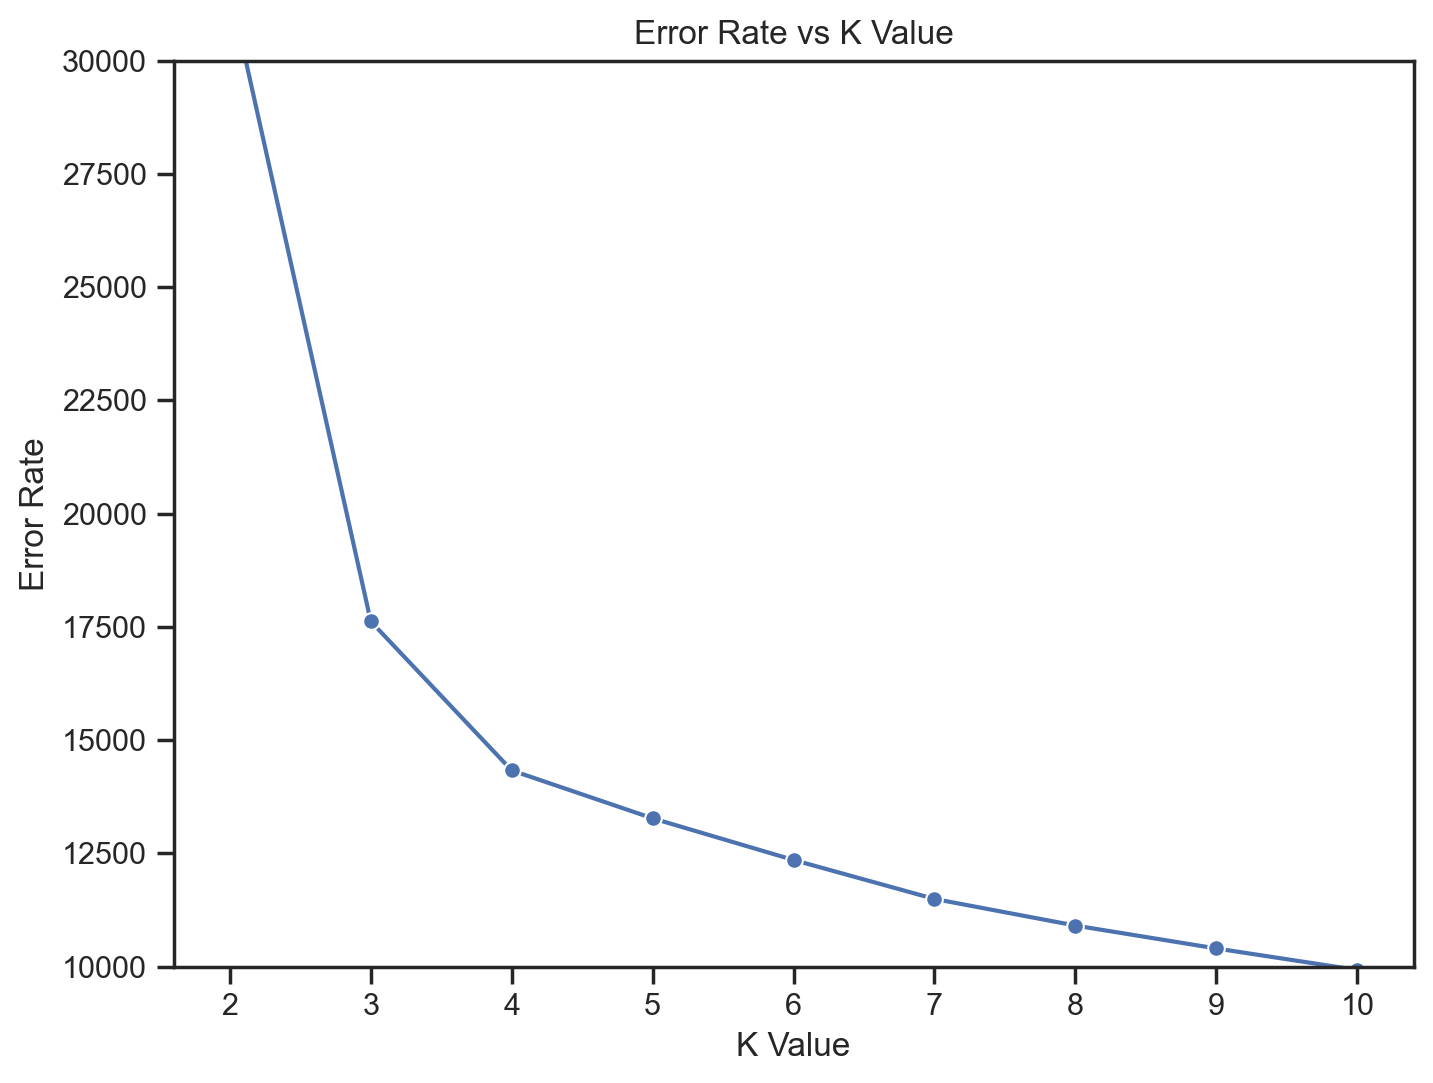

In [30]:
plt.figure(figsize=(8,6))
sns.lineplot(x=range(2,11), y=model_scores, marker='o')
plt.ylim(10000, 30000)

plt.title('Error Rate vs K Value')
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.show()

4 is the point into the graph where the "elbow" is. It means that the best value for our KMeans is 4.

In [31]:
kmeans = KMeans(n_clusters=4, random_state=101)
kmeans.fit(pca_df)
df['Clusters'] = kmeans.predict(pca_df)

In [32]:
order_list = df['Clusters'].value_counts().index.tolist()

Now it's the time to analyze our clusters and present it to our stakeholders.

In [33]:
group1 = order_list[0]
group2 = order_list[1]
group3 = order_list[2]
group4 = order_list[3]

df['Clusters'].replace(group1, 'Group 1', inplace=True)
df['Clusters'].replace(group2, 'Group 2', inplace=True)
df['Clusters'].replace(group3, 'Group 3', inplace=True)
df['Clusters'].replace(group4, 'Group 4', inplace=True)

In [34]:
import plotly.express as px

order = {'Clusters':['Group 1','Group 2','Group 3','Group 4']}

fig = px.pie(df, names='Clusters', color_discrete_sequence=['#fde725','#35b779','#31688e','#440154'],
             title='Distribution of Customers per Group')
fig.show()

In [35]:
fig = px.histogram(data_frame=df, x='Clusters', color='Marital_Status', 
                  color_discrete_sequence=['#3f1b43', '#841e5a', '#cb1b4f', '#f06043', '#f6ab83'], barnorm='percent',
                  category_orders=order, labels={
                     "Marital_Status": "Marital Status",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Percentage Customer's Marital Status per Group")

fig.show()

In [36]:
color = ['darkslategray']

fig = px.histogram(data_frame=df, x='Clusters', y='Income', histfunc='avg', 
                   category_orders=order, color_discrete_sequence=color)

fig.update_layout(yaxis_title='Avg of Income',
                 title="Average of Income per Group")

fig.show()

In [37]:
fig = px.histogram(data_frame=df, x='Clusters', y='Children', histfunc='avg', 
                   category_orders=order, color_discrete_sequence=color)

fig.update_layout(yaxis_title='Avg of Children',
                 title="Average of Children per Group")

fig.show()

In [38]:
round(len(df[(df['Clusters']=='Group 1') & (df['Children']>0)]) / len(df[df['Clusters']=='Group 1']) * 100,2)

86.84

In [39]:
round(len(df[(df['Clusters']=='Group 2') & (df['Children']>0)]) / len(df[df['Clusters']=='Group 2']) * 100,2)

15.27

In [40]:
round(len(df[(df['Clusters']=='Group 3') & (df['Children']>0)]) / len(df[df['Clusters']=='Group 3']) * 100,2)

75.43

In [41]:
round(len(df[(df['Clusters']=='Group 4') & (df['Children']>0)]) / len(df[df['Clusters']=='Group 4']) * 100,2)

96.46

In [42]:
fig = px.histogram(data_frame=df, x='Clusters', y='NumDealsPurchases', histfunc='avg', 
                   category_orders=order, color_discrete_sequence=color)

fig.update_layout(yaxis_title='Avg of Purchases with Discount',
                 title="Average of Purchases with Discount per Group")

fig.show()

In [43]:
fig = px.histogram(data_frame=df, y=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'], x='Clusters',
                   category_orders=order, color_discrete_sequence=['#fde725','#35b779','#31688e','#440154'],
                   barnorm='percent',
                  labels={
                      "variable": "By",
                      "Clusters": "Group"})

fig.update_layout(yaxis_title='By',
                 title="Where the Purchase was Made")

fig.show()

In [44]:
fig = px.violin(data_frame=df, x='Clusters', y='Age', category_orders=order, color_discrete_sequence=color, box=True,
               title='Age of Customers per Group')

fig.show()

In [45]:
fig = px.violin(data_frame=df, x='Clusters', y='MntSpent', category_orders=order, color_discrete_sequence=color, box=True)

fig.update_layout(yaxis_title='Amount Spent',
                 title="Amount Spent per Group")

fig.show()

In [46]:
fig = px.histogram(data_frame=df, y=["MntWines",
                                    "MntFruits",
                                    "MntMeatProducts",
                                    "MntFishProducts",
                                    "MntSweetProducts",
                                    "MntGoldProds"],
                x='Clusters',
                category_orders=order, color_discrete_sequence=['#35193e','#701f57','#ad1759','#e13342','#f37651','#f6b48f'],
                barnorm='percent',
                labels={
                      "variable": "By",
                      "Clusters": "Group"})

fig.update_layout(yaxis_title='Products',
                 title="Products Bought per Group")

fig.show()

In [47]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


In [48]:
fig = px.histogram(data_frame=df, x='Clusters', y='NumPurchases', histfunc='avg', 
                   category_orders=order, color_discrete_sequence=color)

fig.update_layout(yaxis_title='Avg of Purchases',
                 title="Average of Purchases per Group")

fig.show()

In [69]:
fig = px.histogram(data_frame=df, x='Clusters', color='AcceptedCmp1', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted First Campaign")

fig.show()

In [68]:
fig = px.histogram(data_frame=df, x='Clusters', color='AcceptedCmp2', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted Second Campaign")

fig.show()

In [67]:
fig = px.histogram(data_frame=df, x='Clusters', color='AcceptedCmp3', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted Third Campaign")

fig.show()

In [65]:
fig = px.histogram(data_frame=df, x='Clusters', color='AcceptedCmp4', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted Fourth Campaign")

fig.show()

In [64]:
fig = px.histogram(data_frame=df, x='Clusters', color='AcceptedCmp5', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted Fifth Campaign")

fig.show()

In [66]:
fig = px.histogram(data_frame=df, x='Clusters', color='Response', barnorm='percent',
                  category_orders=order, labels={
                     "AcceptedCmp1": "Accepted",
                     "Clusters": "Group"})

fig.update_layout(yaxis_title='Percentage',
                 title="Accepted Last Campaign")

fig.show()

## Insights:

#### Group 1
- The bigger. Is almost a half of our customers;
- Has the lowest avg of Income (35k yearly);
- The majority of customers has children (87% has);
- Almost don't buy by Catalog;
- The youngest group (43-57);
- The lower average of amout spent (37-106) with the mean in 60;
- The campaign that most affected it's customers was the last one (8% accepted);

#### Group 2
- Is the first most well paid (77k yearly);
- Almost don't has children (84% don't has);
- The higher average of amout spent (1,110-1,685) with the mean in 1,400;
- Have an average of 20 purchases per customer;
- The campaign that most affected it's customers was the last one (26% accepted), and the Fifth (25%);
- Is more sensitive to campaigns;

#### Group 3
- Is the second most well paid (65k yearly);
- The majority of customers has children (75%);
- The oldest group (50-65);
- Have an average of 20 purchases per customer;
- The campaign that most affected it's customers was the last one (18.6% accepted), and the Fourth (18%);
- Is the second group more sensitive to campaigns;

#### Group 4
- The smallest;
- Is the third most well paid (51k yearly);
- Almost every customer has children (96% has);
- Average of 4.5 purchases with discount;
- The campaign that most affected it's customers was the last one (13% accepted);

#### Important considerations:
- All groups have about 35% - 38% of singles customers;
- More than a half of our customers has 1 children;
- The majority of our customers have an anual income between 20,000.00 and 80,000.00 dollars;
- Almost a half of our customers have made 1 purchase with discount;
- The majority of our customers have an age between 35 and 73 years old;
- We have just some few (minus than 15) customers who hasn't buyed anything;
- The majority of our customers are from people who live with someone (together classified).;
- Meat and Wine are the most bought produtcs in all 4 groups;